In [77]:
import pandas as pd

datos = pd.read_csv('salaries.csv')
df = pd.DataFrame(datos)
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [78]:
## PREPROCESAMIENTO
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['company'] = encoder.fit_transform(df['company'])
df['job'] = encoder.fit_transform(df['job'])
df['degree'] = encoder.fit_transform(df['degree'])
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


##### Recordar: Existen Decision Tree Classifier : se utiliza para resolver problemas de clasificación. Por ejemplo, predicen si una persona tendrá su préstamo aprobado.
##### Decision Tree Regressor : se utiliza para resolver problemas de regresión. Por ejemplo, la predicción de cuántas personas morirán debido a una sobredosis de opiáceos .

In [114]:
## LUEGO DIVIDIMOS LOS DATOS
X = df.iloc[:,0:3]
Y = df['salary_more_then_100k']

## Tambien podia ser X = df.loc[:,['company','job','degree']] pero por facilidad

#### Recordar: Los hiperparametros se encuentran en:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


#### Recordar: Si queremos escoger una maxima profundidad se debe estar evaluando cosntantemente el modelo porque podemos caer en overfiting

In [115]:
## CREACION DEL MODELO : DecisionTreeClassifier ya que es clasificacion
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)
Y_predic = model.predict(X_test)


In [116]:
model.score(X_test,Y_test)
## ESTO SERIA OVERFITING PERO TENER EN CUENTA LA CANTIDAD DE LOS DATOS

0.5

In [117]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_test,Y_predic)
print(matriz)

[[0 1]
 [1 2]]


In [119]:
from sklearn.metrics import classification_report
report = classification_report(Y_predic,Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



##### Graficacion del modelo

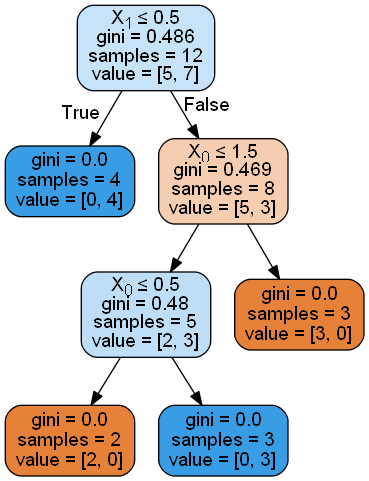

In [7]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
### C:\Program Files (x86)\Graphviz2.38\bin
### instalar python -m pip install pydotplus
## instalacion de graviz https://www.youtube.com/watch?v=z-AGmGmR6Z8&t=190s
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### AHORA CON ARBOL DE REGRESSION

#### Hiperparametros: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [90]:
datos2 = pd.read_csv('carprice.csv')
df2 = pd.DataFrame(datos2)
df2 = df2.drop(['car_ID'], axis=1)
df2

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [91]:
## PREPROCESAMIENTO
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['CarName'] = encoder.fit_transform(df2['CarName'])
df2['fueltype'] = encoder.fit_transform(df2['fueltype'])
df2['aspiration'] = encoder.fit_transform(df2['aspiration'])
df2['doornumber'] = encoder.fit_transform(df2['doornumber'])
df2['carbody'] = encoder.fit_transform(df2['carbody'])
df2['drivewheel'] = encoder.fit_transform(df2['drivewheel'])
df2['enginelocation'] = encoder.fit_transform(df2['enginelocation'])
df2['enginetype'] = encoder.fit_transform(df2['enginetype'])
df2['cylindernumber'] = encoder.fit_transform(df2['cylindernumber'])
df2['fuelsystem'] = encoder.fit_transform(df2['fuelsystem'])
df2.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [105]:
##DIVISION DE DATOS 
X = df2.iloc[:,0:24]
Y = df2['price']

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X2,Y2, test_size=0.20)
model = DecisionTreeRegressor(criterion='mse')
model.fit(X_train,Y_train)
Y_predic = model.predict(X_test)

In [107]:
model.score(X_test,Y_test)

0.8389565789971504

In [109]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_predic,Y_test)
print(error)

14862715.296436315


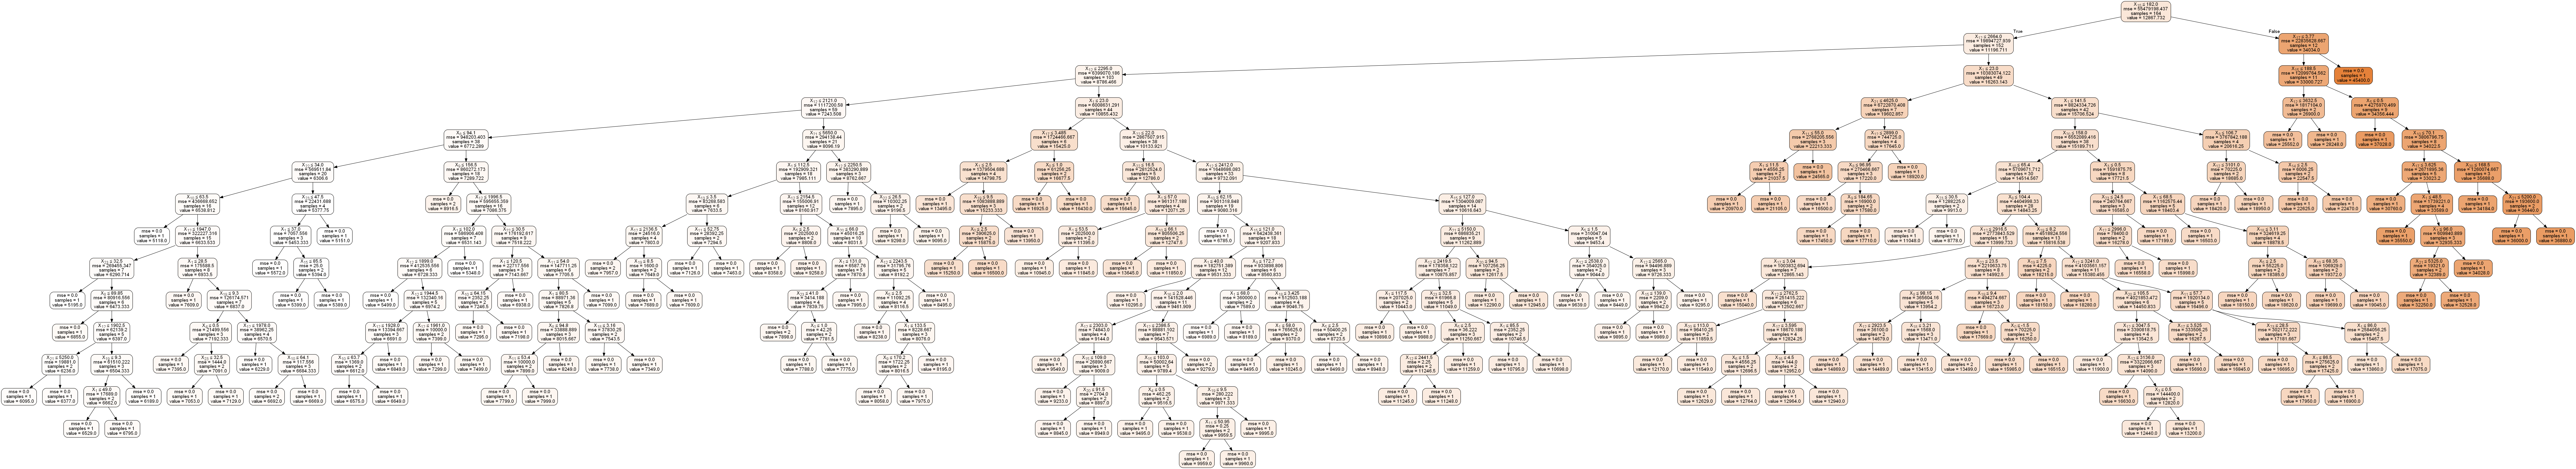

In [110]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
### C:\Program Files (x86)\Graphviz2.38\bin
### instalar python -m pip install pydotplus
## instalacion de graviz https://www.youtube.com/watch?v=z-AGmGmR6Z8&t=190s
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
### CODIGO CLASE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)
prof = 3
## El hiperparametro criterion es el criterio de separacion, como es problema de categoria
## esta gini o entropy
model = DecisionTreeClassifier(criterion='gini', max_depth=prof)
model.fit(X_train, Y_train)


feature = np.unique(model.tree_.feature[model.tree_.feature >= 0])
print('Caracteristicas escogidas: ', feature)
print('Valor de Training :', model.score(X_train, Y_train).round(2))
print('Valor de Test :', model.score(X_test,Y_test).round(2))
## IMPRIMIR PRIMERO ESTO, LO QUE NOS DICE LAS CARACTERISTICAS ESCOGIDAS SON LOS 
##INDICES DE ESTAS, PARA VER LOS NOMBRES
print('Nombre de catacteristicas :', df_wisconsin.columns[1],df_wisconsin.columns[14],df_wisconsin.columns[21],df_wisconsin.columns[23],df_wisconsin.columns[26],df_wisconsin.columns[27] )

Y_predic = model.predict(X_test)
model.score(X_test,Y_test)


##IMPORTANTE:   ESCOGER UNA PROFUNIDAD ADECUADA OSINO PODRIAMOS CAER EN OVERFITING
## ESTO SE EVIDENCIA CUANDO EL TRAININ ES CERCAO A 1 PERO EL TES


## EN ESTE CASO SE NOS PODIA MOSTRAR LOS ATRIBUTOS ESCOGIDOS, SUS POSICIONES